In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from sklearn import preprocessing
import plotly.figure_factory as ff
plotly.tools.set_credentials_file(username='yaghdev', api_key='BZvETrFTjtGisnoBsxAP')

In [67]:
year = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
page_rank_us = []
degree_us = []
betweeness_us = []
eigenvalue_us = []
closeness_us = []
for i in year:    
    excel_ins = pd.read_excel('C:/Users/Krishan/Downloads/FT50_WOS/insitutional_year_wise_all/Insitutional_'+str(i)+'.xlsx')
    excel_ins = excel_ins.loc[excel_ins['Insitute'].apply(lambda x: x[-4:] == 'USA.')]
    excel_1 = excel_ins.iloc[:,1:].values
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    x_scaled = min_max_scaler.fit_transform(excel_1)
    excel_2 = pd.DataFrame(x_scaled, columns=['eigenvector', 'closeness centrality', 'betweenness centrality', 'page rank', 'degree'])
    excel_2['Insitute'] = excel_ins.iloc[:,0].values
    degree_us.append(excel_2.corr(method='pearson', min_periods=1).loc['page rank'].values[4])
    betweeness_us.append(excel_2.corr(method='pearson', min_periods=1).loc['page rank'].values[2])
    closeness_us.append(excel_2.corr(method='pearson', min_periods=1).loc['page rank'].values[1])
    eigenvalue_us.append(excel_2.corr(method='pearson', min_periods=1).loc['page rank'].values[0]) 

In [68]:
year = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
page_rank_nonus = []
degree_nonus = []
betweeness_nonus = []
eigenvalue_nonus = []
closeness_nonus = []
for i in year:    
    excel_ins = pd.read_excel('C:/Users/Krishan/Downloads/FT50_WOS/insitutional_year_wise_all/Insitutional_'+str(i)+'.xlsx')
    excel_ins = excel_ins.loc[excel_ins['Insitute'].apply(lambda x: x[-4:] != 'USA.')]
    excel_1 = excel_ins.iloc[:,1:].values
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    x_scaled = min_max_scaler.fit_transform(excel_1)
    excel_2 = pd.DataFrame(x_scaled, columns=['eigenvector', 'closeness centrality', 'betweenness centrality', 'page rank', 'degree'])
    excel_2['Insitute'] = excel_ins.iloc[:,0].values
    degree_nonus.append(excel_2.corr(method='pearson', min_periods=1).loc['page rank'].values[4])
    betweeness_nonus.append(excel_2.corr(method='pearson', min_periods=1).loc['page rank'].values[2])
    closeness_nonus.append(excel_2.corr(method='pearson', min_periods=1).loc['page rank'].values[1])
    eigenvalue_nonus.append(excel_2.corr(method='pearson', min_periods=1).loc['page rank'].values[0]) 

Text(0.5,0,'Page Rank - Degree')

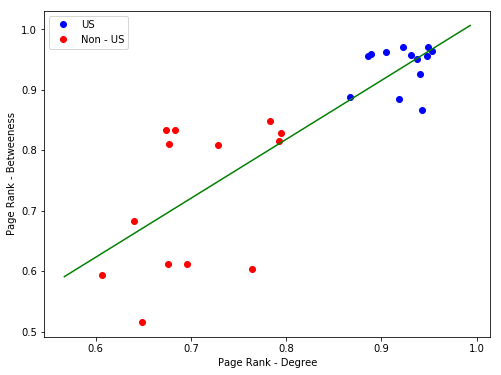

In [84]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(betweeness_us, degree_us, 'ro', color ='b')
ax1.plot(betweeness_nonus, degree_nonus, 'ro', color ='r') 

X = betweeness_us+betweeness_nonus
Y = degree_us+degree_nonus
mean_x = np.mean(X)
mean_y = np.mean(Y)
n = len(X)
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
 
max_x = np.max(X)+0.04
min_x = np.min(X)-0.04
x = np.linspace(min_x, max_x, 1000)
y = c + m * x 
plt.plot(x, y, color='green', label='Regression Line')

ax1.legend(['US', 'Non - US'])
plt.ylabel('Page Rank - Betweeness')
plt.xlabel('Page Rank - Degree')